In [1]:
import kan
import kan.utils as ku
import torch
import torch.nn as nn
import numpy as np
from libraries import utils
from libraries import magnetization
from libraries import j1j2_functions
import numpy.random as npr
import qutip as qt
import sympy
import random

In [2]:
N=10
input = utils.generate_input_torch(N)
labels = torch.tensor([-1 + 2 * (magnetization.count_half_magnetization(i) % 2) for i in range(2 ** N)]).reshape((-1, 1))

In [3]:
dataset = {'train_input': input, 'train_label': labels, 'test_input': input, 'test_label': labels}
kan_model = kan.KAN(width = [N, N, 1, 1])
kan_model(dataset['train_input']); # have to do this step first before fixing symbolic
tanh = lambda x : torch.tanh(x)
kan_model.fix_symbolic(2, 0, 0, tanh)
kan_model.symbolic_fun[2].affine = nn.Parameter(torch.tensor([[[1, 0, 1, 0]]], dtype=torch.float64), requires_grad=False)

checkpoint directory created: ./model
saving model version 0.0
saving model version 0.1


In [4]:
kan_model.symbolic_fun[0](input)[0].shape

torch.Size([1024, 10])

In [5]:
kan_model.symbolic_fun[0](input)[1].shape

torch.Size([1024, 10, 10])

In [6]:
kan_model.symbolic_fun[0](input)

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<SumBackward1>),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 

In [7]:
kan_model.width

[[10, 0], [10, 0], [1, 0], [1, 0]]

In [8]:
kan_model.symbolic_fun[0].affine.shape

torch.Size([10, 10, 4])

In [9]:
kan_model.symbolic_fun[0].affine

Parameter containing:
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],


In [10]:
torch.tensor([1, 0, 1, 0]).repeat((10, 10, 1))

tensor([[[1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0]],

        [[1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0]],

        [[1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0]],

        [[1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0]],

        [[1, 0, 1, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 0],
   

In [11]:
for i in range(kan_model.width[0][0]):
    for j in range(kan_model.width[1][0]):
        kan_model.fix_symbolic(0, i, j, 'x', log_history=False, verbose=False)

In [12]:
kan_model.symbolic_fun[0].affine

Parameter containing:
tensor([[[-7.8000e+00, -1.0000e+01,  1.6730e-02,  1.7757e-01],
         [-7.3034e+00, -2.7978e+00,  6.4121e-03,  2.2278e-02],
         [-6.4187e+00,  5.8046e+00,  2.8303e-02, -1.7617e-01],
         [-9.7400e+00, -9.4276e+00,  6.2814e-04, -3.2223e-03],
         [-9.3262e+00, -8.7743e+00,  1.9006e-02,  1.5388e-01],
         [-5.0781e+00, -4.9838e+00, -1.6028e-02, -7.4153e-02],
         [-7.8414e+00, -9.7955e+00, -1.1876e-02, -1.1266e-01],
         [-5.6141e+00, -6.0984e+00,  1.3334e-02,  8.1829e-02],
         [-7.8014e+00, -9.7436e+00, -1.1972e-02, -1.1937e-01],
         [-9.9542e+00, -9.3907e+00, -8.3420e-03, -7.5476e-02]],

        [[-3.8000e+00, -1.0000e+01, -4.3494e-02, -4.4238e-01],
         [-8.4049e+00, -3.3863e+00, -1.1487e-02, -2.8633e-02],
         [-2.0438e+00, -5.4352e-01, -9.7453e-02, -4.2048e-02],
         [-9.4440e+00, -9.9994e+00,  1.0593e-02,  9.8333e-02],
         [-3.8000e+00, -9.4000e+00, -5.5478e-02, -5.2144e-01],
         [-1.9265e+00, -3.3368e

In [13]:
# kan_model.symbolic_fun[0].affine = nn.Parameter(torch.tensor([1, 0, 1, 0], dtype=torch.float64).repeat(N, N, 1),requires_grad=False)
# kan_model.symbolic_fun[0].affine

In [14]:
kan_model.symbolic_fun[0].in_dim

10

In [15]:
kan_model.symbolic_fun[2](torch.tensor([[1], [0.5], [0.25]]))

(tensor([[0.7616],
         [0.4621],
         [0.2449]]),
 tensor([[[0.7616]],
 
         [[0.4621]],
 
         [[0.2449]]]))

In [16]:
[n for n in input]

[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0., 1., 1., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([0., 1., 0., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 1., 0., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([0., 1., 1., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 1., 1., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 tensor([0., 1., 0., 0., 1., 0., 0., 0., 0., 0.]),
 tensor([1., 1., 0., 0., 1., 0.

In [17]:
kan_model.symbolic_fun[0](input)

(tensor([[-9.2394e-03,  2.7285e-02,  2.6875e-02,  ...,  1.6016e-03,
           7.9046e-03,  1.7281e-04],
         [-1.3973e-01,  1.9256e-01,  1.8977e-02,  ..., -1.4617e-01,
           1.6155e-01, -3.9303e-02],
         [-5.6069e-02,  1.2383e-01,  1.0463e-01,  ...,  2.1424e-01,
          -1.1081e-01, -8.4727e-02],
         ...,
         [-2.2868e-01,  9.5380e-02,  6.3875e-01,  ..., -2.2112e-01,
           3.9753e-01, -3.3576e-01],
         [-1.4501e-01,  2.6648e-02,  7.2440e-01,  ...,  1.3928e-01,
           1.2517e-01, -3.8118e-01],
         [-2.7551e-01,  1.9193e-01,  7.1650e-01,  ..., -8.4902e-03,
           2.7882e-01, -4.2066e-01]], grad_fn=<SumBackward1>),
 tensor([[[ 0.0103,  0.0043, -0.0119,  ...,  0.0005, -0.0027,  0.0029],
          [-0.0074,  0.0103,  0.0109,  ...,  0.0067,  0.0052, -0.0097],
          [ 0.0133,  0.0015,  0.0026,  ...,  0.0030, -0.0014,  0.0003],
          ...,
          [-0.0022, -0.0020,  0.0035,  ..., -0.0025, -0.0011,  0.0054],
          [ 0.0075, -0.0128

In [18]:
kan_model(input)

tensor([[-0.0622],
        [-0.1150],
        [-0.0239],
        ...,
        [-0.2616],
        [-0.1755],
        [-0.2372]], grad_fn=<AddBackward0>)

In [19]:
kan_model.fit(dataset, steps=50, lamb=1e-3);

| train_loss: 1.25e-02 | test_loss: 1.25e-02 | reg: 2.77e+00 | : 100%|█| 50/50 [00:49<00:00,  1.01it

saving model version 0.2


In [20]:
kan_model(input)

tensor([[-0.9880],
        [ 0.9865],
        [-0.9878],
        ...,
        [ 0.9857],
        [-0.9883],
        [ 0.9859]], grad_fn=<AddBackward0>)

In [21]:
labels

tensor([[-1],
        [ 1],
        [-1],
        ...,
        [ 1],
        [-1],
        [ 1]])

saving model version 0.3


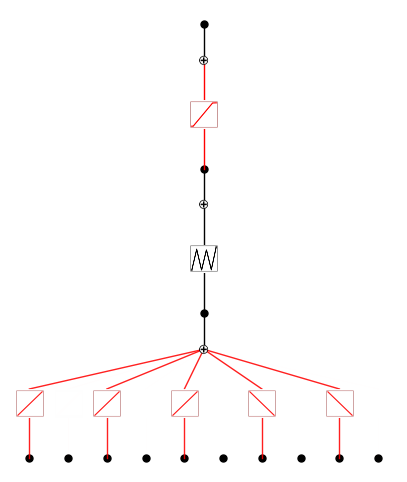

In [22]:
kan_model.prune().plot()

In [23]:
kan_model = kan_model.prune()

saving model version 0.3


  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0      sin    0.997262 -8.507559           2                2   -5.355292
1      cos    0.997262 -8.507528           2                2   -5.355270
2      tan    0.996606 -8.198449           3                3   -4.838914
3      1/x    0.457730 -0.882890           2                2   -0.018023
4        0    0.000000  0.000014           0                0    0.000010


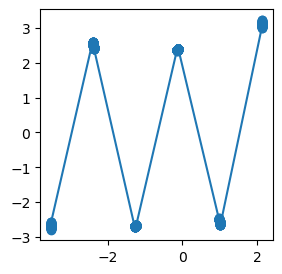

In [24]:
kan_model.get_fun(1, 0, 0);
kan_model.suggest_symbolic(1, 0, 0, weight_simple = 0.3);

In [25]:
kan_model.auto_symbolic(weight_simple = 0.3);

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,3,0) since already symbolic
skipping (0,4,0) since already symbolic
skipping (0,5,0) since already symbolic
skipping (0,6,0) since already symbolic
skipping (0,7,0) since already symbolic
skipping (0,8,0) since already symbolic
skipping (0,9,0) since already symbolic


fixing (1,0,0) with sin, r2=0.9972622990608215, c=2
skipping (2,0,0) since already symbolic
saving model version 0.4


In [26]:
kan_model.fit(dataset, update_grid=False, steps=50);

| train_loss: 1.09e-05 | test_loss: 1.09e-05 | reg: 0.00e+00 | : 100%|█| 50/50 [00:04<00:00, 11.19it


saving model version 0.5


In [27]:
import dill
import inspect
def symbolic_formula(self, var=None, normalizer=None, output_normalizer = None):
    '''
    get symbolic formula

    Args:
    -----
        var : None or a list of sympy expression
            input variables
        normalizer : [mean, std]
        output_normalizer : [mean, std]
        
    Returns:
    --------
        None

    Example
    -------
    >>> from kan import *
    >>> model = KAN(width=[2,1,1], grid=5, k=3, noise_scale=0.0, seed=0)
    >>> f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]])+x[:,[1]]**2)
    >>> dataset = create_dataset(f, n_var=3)
    >>> model.fit(dataset, opt='LBFGS', steps=20, lamb=0.001);
    >>> model.auto_symbolic()
    >>> model.symbolic_formula()[0][0]
    '''
    
    symbolic_acts = []
    symbolic_acts_premult = []
    x = []

    def ex_round(ex1, n_digit):
        ex2 = ex1
        for a in sympy.preorder_traversal(ex1):
            if isinstance(a, sympy.Float):
                ex2 = ex2.subs(a, round(a, n_digit))
        return ex2

    # define variables
    if var == None:
        for ii in range(1, self.width[0][0] + 1):
            exec(f"x{ii} = sympy.Symbol('x_{ii}')")
            exec(f"x.append(x{ii})")
    elif isinstance(var[0], sympy.Expr):
        x = var
    else:
        x = [sympy.symbols(var_) for var_ in var]

    x0 = x

    if normalizer != None:
        mean = normalizer[0]
        std = normalizer[1]
        x = [(x[i] - mean[i]) / std[i] for i in range(len(x))]

    symbolic_acts.append(x)

    for l in range(len(self.width_in) - 1):
        num_sum = self.width[l + 1][0]
        num_mult = self.width[l + 1][1]
        y = []
        for j in range(self.width_out[l + 1]):
            yj = 0.
            for i in range(self.width_in[l]):
                a, b, c, d = self.symbolic_fun[l].affine[j, i]
                sympy_fun = self.symbolic_fun[l].funs_sympy[j][i]
                try:
                    yj += c * sympy_fun(a * x[i] + b) + d
                except:
                    print(sympy_fun)
                    print(inspect.getsource(sympy_fun))
                    print(dill.source.getsource(sympy_fun))
                    print(f'{sympy_fun=}')
                    print(f'{self.symbolic_fun[l].funs_sympy[j][i]=}')
                    print(f'{sympy_fun=}'.split('=')[0])
                    # sympy_fun = sympy.Function(f'{sympy_fun=}'.split('=')[0])
                    sympy_fun = sympy.Function(f'({inspect.getsource(sympy_fun)})')
                    yj += c * sympy_fun(a * x[i] + b) + d
                    # yj += c * sympy.tanh(a * x[i] + b) + d
                    print('make sure all activations need to be converted to symbolic formulas first!')
                    # return
            yj = self.subnode_scale[l][j] * yj + self.subnode_bias[l][j]
            y.append(yj)
                
        symbolic_acts_premult.append(y)
            
        mult = []
        for k in range(num_mult):
            if isinstance(self.mult_arity, int):
                mult_arity = self.mult_arity
            else:
                mult_arity = self.mult_arity[l+1][k]
            for i in range(mult_arity-1):
                if i == 0:
                    mult_k = y[num_sum+2*k] * y[num_sum+2*k+1]
                else:
                    mult_k = mult_k * y[num_sum+2*k+i+1]
            mult.append(mult_k)
            
        y = y[:num_sum] + mult
        
        for j in range(self.width_in[l+1]):
            y[j] = self.node_scale[l][j] * y[j] + self.node_bias[l][j]
        
        x = y
        symbolic_acts.append(x)

    if output_normalizer != None:
        output_layer = symbolic_acts[-1]
        means = output_normalizer[0]
        stds = output_normalizer[1]

        assert len(output_layer) == len(means), 'output_normalizer does not match the output layer'
        assert len(output_layer) == len(stds), 'output_normalizer does not match the output layer'
        
        output_layer = [(output_layer[i] * stds[i] + means[i]) for i in range(len(output_layer))]
        symbolic_acts[-1] = output_layer


    self.symbolic_acts = [[symbolic_acts[l][i] for i in range(len(symbolic_acts[l]))] for l in range(len(symbolic_acts))]
    self.symbolic_acts_premult = [[symbolic_acts_premult[l][i] for i in range(len(symbolic_acts_premult[l]))] for l in range(len(symbolic_acts_premult))]

    out_dim = len(symbolic_acts[-1])
    #return [symbolic_acts[-1][i] for i in range(len(symbolic_acts[-1]))], x0
    return [symbolic_acts[-1][i] for i in range(len(symbolic_acts[-1]))], x0

In [28]:
ku.ex_round(symbolic_formula(kan_model)[0][0], 4)

<function <lambda> at 0x0000017F1C21A020>
tanh = lambda x : torch.tanh(x)

tanh = lambda x : torch.tanh(x)

sympy_fun=<function <lambda> at 0x0000017F1C21A020>
self.symbolic_fun[l].funs_sympy[j][i]=<function <lambda> at 0x0000017F1C21A020>
sympy_fun
make sure all activations need to be converted to symbolic formulas first!


1.0123*(tanh = lambda x : torch.tanh(x)
)(-2.5587*sin(-3.107*x_1 + 0.0023*x_10 + 0.0022*x_2 - 3.1348*x_3 - 0.0015*x_4 - 3.1254*x_5 + 0.0007*x_6 + 3.1433*x_7 + 0.0023*x_8 + 3.1354*x_9 - 4.7424) - 0.0908) + 0.0022

In [50]:
kan_model = kan.KAN(width = [N, N, 1])
kan_model(dataset['train_input']); # have to do this step first before fixing symbolic

checkpoint directory created: ./model
saving model version 0.0


In [51]:
for i in range(kan_model.width[0][0]):
    for j in range(kan_model.width[1][0]):
        kan_model.fix_symbolic(0, i, j, 'x', log_history=False, verbose=False)

In [52]:
kan_model.fit(dataset, steps=50, lamb=0);

| train_loss: 3.28e-03 | test_loss: 3.28e-03 | reg: 2.62e+00 | : 100%|█| 50/50 [00:44<00:00,  1.13it

saving model version 0.1


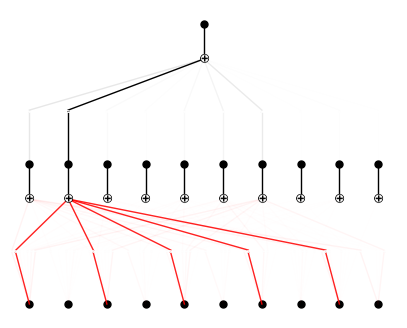

In [53]:
kan_model.plot()

saving model version 0.2


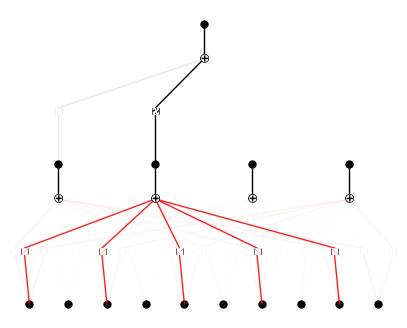

In [54]:
kan_model = kan_model.prune()
kan_model.plot()

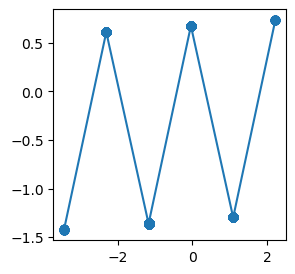

In [55]:
kan_model.get_fun(1, 1, 0);